In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import csv

train_data = pd.read_csv(r"C:\Users\USER\Python_Projects\Titanic\Datasets\train.csv")
test_data = pd.read_csv(r"C:\Users\USER\Python_Projects\Titanic\Datasets\test.csv")

# 特徴量の選択
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna("S")
train_data.loc[train_data["Sex"] == "male", "Sex"] = 0
train_data.loc[train_data["Sex"] == "female", "Sex"] = 1
train_data.loc[train_data["Embarked"] == "S", "Embarked"] = 0
train_data.loc[train_data["Embarked"] == "C", "Embarked"] = 1
train_data.loc[train_data["Embarked"] == "Q", "Embarked"] = 2

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data.loc[test_data["Sex"] == "male", "Sex"] = 0
test_data.loc[test_data["Sex"] == "female", "Sex"] = 1
test_data.loc[test_data["Embarked"] == "S", "Embarked"] = 0
test_data.loc[test_data["Embarked"] == "C", "Embarked"] = 1
test_data.loc[test_data["Embarked"] == "Q", "Embarked"] = 2
test_data.loc[152, "Fare"] = test_data.Fare.median()

train_data = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

test_data = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

train, val = train_test_split(train_data)

In [80]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
32,1,3,1,28.0,0,0,7.7500,2
332,0,1,0,38.0,0,1,153.4625,0
61,1,1,1,38.0,0,0,80.0000,0
217,0,2,0,42.0,1,0,27.0000,0
7,0,3,0,2.0,3,1,21.0750,0
...,...,...,...,...,...,...,...,...
355,0,3,0,28.0,0,0,9.5000,0
344,0,2,0,36.0,0,0,13.0000,0
827,1,2,0,1.0,0,2,37.0042,1
24,0,3,1,8.0,3,1,21.0750,0


In [3]:
import torch
import pandas as pd

df = pd.DataFrame(train)
train_tensor = torch.from_numpy(df.iloc[:, :].astype('float32').values)

df = pd.DataFrame(test)
test_tensor = torch.from_numpy(df.iloc[:, :].astype('float32').values)

NameError: name 'test' is not defined

In [81]:
train_tensor

tensor([[  1.0000,   3.0000,   1.0000,  ...,   0.0000,   7.7500,   2.0000],
        [  0.0000,   1.0000,   0.0000,  ...,   1.0000, 153.4625,   0.0000],
        [  1.0000,   1.0000,   1.0000,  ...,   0.0000,  80.0000,   0.0000],
        ...,
        [  1.0000,   2.0000,   0.0000,  ...,   2.0000,  37.0042,   1.0000],
        [  0.0000,   3.0000,   1.0000,  ...,   1.0000,  21.0750,   0.0000],
        [  0.0000,   2.0000,   0.0000,  ...,   0.0000,  10.5000,   0.0000]])

[1] loss: 0.726
[2] loss: 0.621
[3] loss: 0.628
[4] loss: 0.612
[5] loss: 0.611
[6] loss: 0.607
[7] loss: 0.619
[8] loss: 0.621
[9] loss: 0.611
[10] loss: 0.606
[11] loss: 0.602
[12] loss: 0.610
[13] loss: 0.609
[14] loss: 0.619
[15] loss: 0.593
[16] loss: 0.603
[17] loss: 0.610
[18] loss: 0.612
[19] loss: 0.599
[20] loss: 0.601
[21] loss: 0.606
[22] loss: 0.593
[23] loss: 0.595
[24] loss: 0.606
[25] loss: 0.601
[26] loss: 0.604
[27] loss: 0.598
[28] loss: 0.596
[29] loss: 0.598
[30] loss: 0.600
[31] loss: 0.592
[32] loss: 0.599
[33] loss: 0.597
[34] loss: 0.602
[35] loss: 0.597
[36] loss: 0.603
[37] loss: 0.589
[38] loss: 0.601
[39] loss: 0.611
[40] loss: 0.595
[41] loss: 0.589
[42] loss: 0.598
[43] loss: 0.601
[44] loss: 0.596
[45] loss: 0.594
[46] loss: 0.589
[47] loss: 0.594
[48] loss: 0.601
[49] loss: 0.599
[50] loss: 0.601
[51] loss: 0.590
[52] loss: 0.595
[53] loss: 0.598
[54] loss: 0.592
[55] loss: 0.596
[56] loss: 0.602
[57] loss: 0.599
[58] loss: 0.591
[59] loss: 0.587
[60] l

[464] loss: 0.486
[465] loss: 0.506
[466] loss: 0.468
[467] loss: 0.459
[468] loss: 0.487
[469] loss: 0.471
[470] loss: 0.466
[471] loss: 0.479
[472] loss: 0.470
[473] loss: 0.465
[474] loss: 0.461
[475] loss: 0.488
[476] loss: 0.471
[477] loss: 0.490
[478] loss: 0.480
[479] loss: 0.485
[480] loss: 0.446
[481] loss: 0.454
[482] loss: 0.478
[483] loss: 0.469
[484] loss: 0.474
[485] loss: 0.468
[486] loss: 0.461
[487] loss: 0.496
[488] loss: 0.461
[489] loss: 0.490
[490] loss: 0.470
[491] loss: 0.485
[492] loss: 0.493
[493] loss: 0.483
[494] loss: 0.457
[495] loss: 0.490
[496] loss: 0.455
[497] loss: 0.467
[498] loss: 0.458
[499] loss: 0.463
[500] loss: 0.457
[501] loss: 0.444
[502] loss: 0.480
[503] loss: 0.481
[504] loss: 0.463
[505] loss: 0.478
[506] loss: 0.466
[507] loss: 0.454
[508] loss: 0.481
[509] loss: 0.462
[510] loss: 0.469
[511] loss: 0.452
[512] loss: 0.459
[513] loss: 0.455
[514] loss: 0.445
[515] loss: 0.528
[516] loss: 0.480
[517] loss: 0.457
[518] loss: 0.497
[519] loss

[921] loss: 0.428
[922] loss: 0.432
[923] loss: 0.429
[924] loss: 0.425
[925] loss: 0.438
[926] loss: 0.424
[927] loss: 0.424
[928] loss: 0.427
[929] loss: 0.431
[930] loss: 0.425
[931] loss: 0.437
[932] loss: 0.433
[933] loss: 0.441
[934] loss: 0.423
[935] loss: 0.435
[936] loss: 0.457
[937] loss: 0.419
[938] loss: 0.407
[939] loss: 0.422
[940] loss: 0.434
[941] loss: 0.459
[942] loss: 0.417
[943] loss: 0.430
[944] loss: 0.427
[945] loss: 0.418
[946] loss: 0.438
[947] loss: 0.444
[948] loss: 0.426
[949] loss: 0.436
[950] loss: 0.430
[951] loss: 0.423
[952] loss: 0.445
[953] loss: 0.436
[954] loss: 0.449
[955] loss: 0.436
[956] loss: 0.428
[957] loss: 0.430
[958] loss: 0.438
[959] loss: 0.422
[960] loss: 0.429
[961] loss: 0.450
[962] loss: 0.433
[963] loss: 0.408
[964] loss: 0.428
[965] loss: 0.443
[966] loss: 0.457
[967] loss: 0.422
[968] loss: 0.436
[969] loss: 0.426
[970] loss: 0.445
[971] loss: 0.437
[972] loss: 0.429
[973] loss: 0.433
[974] loss: 0.442
[975] loss: 0.481
[976] loss

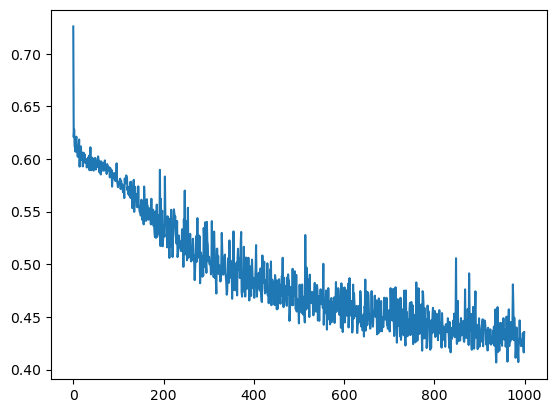

In [22]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt

# データセットの読み込み
train_data = pd.read_csv(r"C:\Users\USER\Python_Projects\Titanic\Datasets\train.csv")
test_data = pd.read_csv(r"C:\Users\USER\Python_Projects\Titanic\Datasets\test.csv")

# 特徴量の選択
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# 欠損値の補完
train_data.fillna(train_data.select_dtypes(include = 'number').mean(), inplace=True)
test_data.fillna(test_data.select_dtypes(include = 'number').mean(), inplace=True)

# カテゴリ変数の変換
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# trainデータをtrainとvalidationに分割
train, val = train_test_split(train_data, test_size=0.2)

class TitanicDataset(Dataset):
    def __init__(self, data, is_test=False):
        if is_test:
            self.X = data[features].values.astype(np.float32)
            self.y = None
        else:
            self.X = data[features].values.astype(np.float32)
            self.y = data['Survived'].values.astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

train_dataset = TitanicDataset(train)
val_dataset = TitanicDataset(val)
test_dataset = TitanicDataset(test_data, is_test=True)

# DataLoaderの定義
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# モデルの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(features), 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0)
        
    def forward(self, x):
        x = self.dropout(x)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        x = x.view(-1)
        return x.float()


#モデルのインスタンス化
model = Net().to(device)

#損失関数の定義
criterion = nn.BCELoss()

#最適化手法の定義
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000

training_error = []

#学習の実行
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        # 勾配を初期化
        optimizer.zero_grad()
        # 順伝播
        outputs = model(inputs)
        # 誤差の計算
        loss = criterion(outputs.T, labels.to(torch.float32))
        # 逆伝播
        loss.backward()
        # パラメータの更新
        optimizer.step()
        # 統計情報の取得
        running_loss += loss.item()
    training_error.append(running_loss / len(train_loader))
    # エポックごとの統計情報の出力
    print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

#検証データに対する予測
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy on validation set: {:.2f} %'.format(100 * correct / total))

#テストデータに対する予測
with torch.no_grad():
    test_outputs = []
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predicted = torch.round(outputs)
        test_outputs.extend(predicted.tolist())

#結果の保存
results = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_outputs})
results['Survived'] = results['Survived'].astype(int)
results.to_csv('submission.csv', index=False)

plt.plot(range(num_epochs), training_error)